In [1]:
import pandas as pd

# Path to your .dta file
file_path = "/Users/danielseymour/Downloads/firmdata.dta"

# Load the .dta file into a pandas DataFrame
df = pd.read_stata(file_path)

# Display the DataFrame
print(df.head())

     year   naics  firmid   sales  operatingexpenses
0  1995.0  111150  1300.0  2029.0             1577.0
1  1995.0  111150  2453.0   423.0              374.0
2  1995.0  111150   208.0    32.0               32.0
3  1995.0  111219  1923.0    73.0              106.0
4  1995.0  111219   459.0    19.0               34.0


In [4]:
# Ensure `year` and `firmid` are in integer format
df['year'] = df['year'].astype(int)  # Convert year to integer
df['firmid'] = df['firmid'].astype(int)  # Convert firmid to integer

# Calculate the number of unique firms per year
firms_per_year = df.groupby('year')['firmid'].nunique().reset_index()

# Rename columns for clarity
firms_per_year.columns = ['Year', 'Number of Firms']

# Display the result
print(firms_per_year)

    Year  Number of Firms
0   1995             4375
1   1996             4587
2   1997             4554
3   1998             4612
4   1999             4537
5   2000             4322
6   2001             4166
7   2002             4169
8   2003             4118
9   2004             4046
10  2005             4001
11  2006             3956
12  2007             3854
13  2008             3772
14  2009             3728
15  2010             3615
16  2011             3529
17  2012             3475
18  2013             3459
19  2014             3376
20  2015             3225


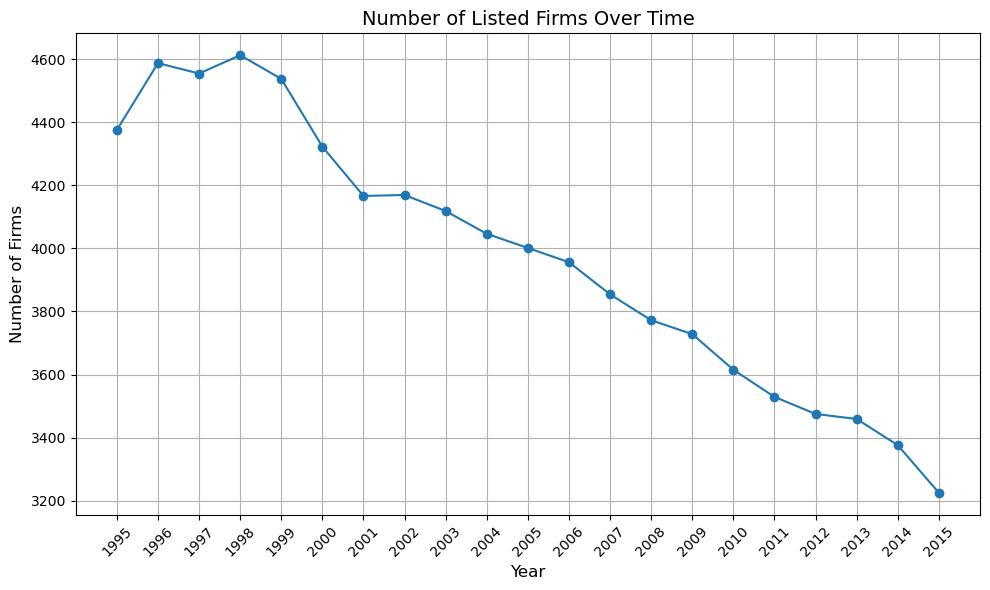

In [5]:
import matplotlib.pyplot as plt

# Create the plot with Matplotlib
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.plot(firms_per_year['Year'], firms_per_year['Number of Firms'], marker='o', linestyle='-')

# Customize the plot
plt.title('Number of Listed Firms Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Firms', fontsize=12)
plt.grid(True)  # Add grid for readability
plt.xticks(firms_per_year['Year'], rotation=45)  # Ensure years are shown as integers
plt.tight_layout()  # Adjust layout to prevent label overlap

# Display the plot
plt.show()

This graph shows how the number of firms has decreased over time, implying increasing concentration.

HHI Formula:
$$HHI = \sum_{i=1}^{N} s_i^2$$

Steps to calculate:
1. Calculate Market Share -- For each firm, compute its market share as:

$$s_i = \frac{\text{Firm's Sales}}{\text{Total Sales of the Industry}}$$

2. Square the Market Shares( s_i^2 )

3. Sum the Squares

In [6]:
#Calculate HHI index for each industry

# Calculate total sales for each year and industry
df['industry_total_sales'] = df.groupby(['year', 'naics'])['sales'].transform('sum')

# Calculate each firm's market share within its industry
df['market_share'] = df['sales'] / df['industry_total_sales']

# Calculate the square of the market share
df['market_share_sq'] = df['market_share'] ** 2

# Calculate HHI for each year and industry
hhi = df.groupby(['year', 'naics'])['market_share_sq'].sum().reset_index()
hhi.columns = ['year', 'naics', 'HHI']

# Calculate the average HHI across industries for each year
avg_hhi_per_year = hhi.groupby('year')['HHI'].mean().reset_index()
avg_hhi_per_year.columns = ['Year', 'Average HHI']

# Display results
print(avg_hhi_per_year)

    Year  Average HHI
0   1995     0.610745
1   1996     0.609248
2   1997     0.602862
3   1998     0.599598
4   1999     0.606492
5   2000     0.612108
6   2001     0.614092
7   2002     0.626454
8   2003     0.627634
9   2004     0.634763
10  2005     0.643254
11  2006     0.652231
12  2007     0.656549
13  2008     0.654418
14  2009     0.652090
15  2010     0.654692
16  2011     0.671538
17  2012     0.669891
18  2013     0.655887
19  2014     0.651748
20  2015     0.657409


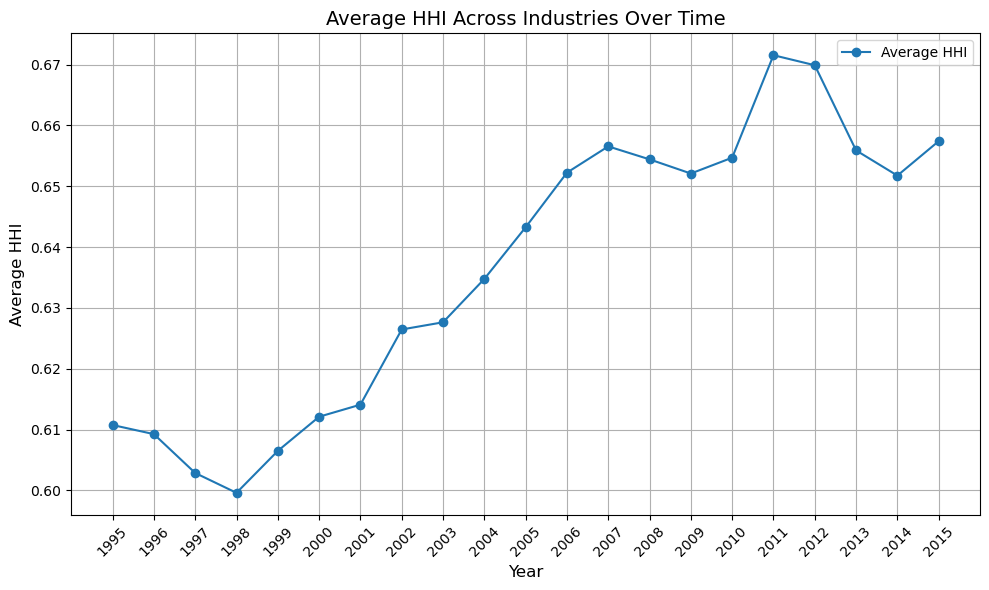

In [7]:
# Plot the average HHI per year
plt.figure(figsize=(10, 6))  # Adjust the size of the plot
plt.plot(avg_hhi_per_year['Year'], avg_hhi_per_year['Average HHI'], marker='o', linestyle='-', label='Average HHI')

# Add labels, title, and grid
plt.title('Average HHI Across Industries Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average HHI', fontsize=12)
plt.grid(True)  # Add grid for better readability
plt.xticks(avg_hhi_per_year['Year'], rotation=45)  # Rotate x-axis labels if needed
plt.legend()  # Add a legend
plt.tight_layout()  # Adjust layout to prevent overlapping

# Show the plot
plt.show()

This shows how HHI is increasing from 1995 to 2015 showing increased concentration. 

Van Reenan (2018) talks about the rising "scale without mass” of firms in the context of: Both measures of concentration have tended to rise, but sales concentration is greater than employment concentration at any point of time.  This illustrates that many firms have “scale without
mass”—e.g., many high-revenue firms like Google and Facebook have
relatively few employees (see Brynjolfsson et al. 2008). Furthermore,
unlike other sectors, in manufacturing the growth in employment
concentration is pretty flat compared to sales concentration. 

Conclusion: the ratio of sales to operating expenses has increased over time

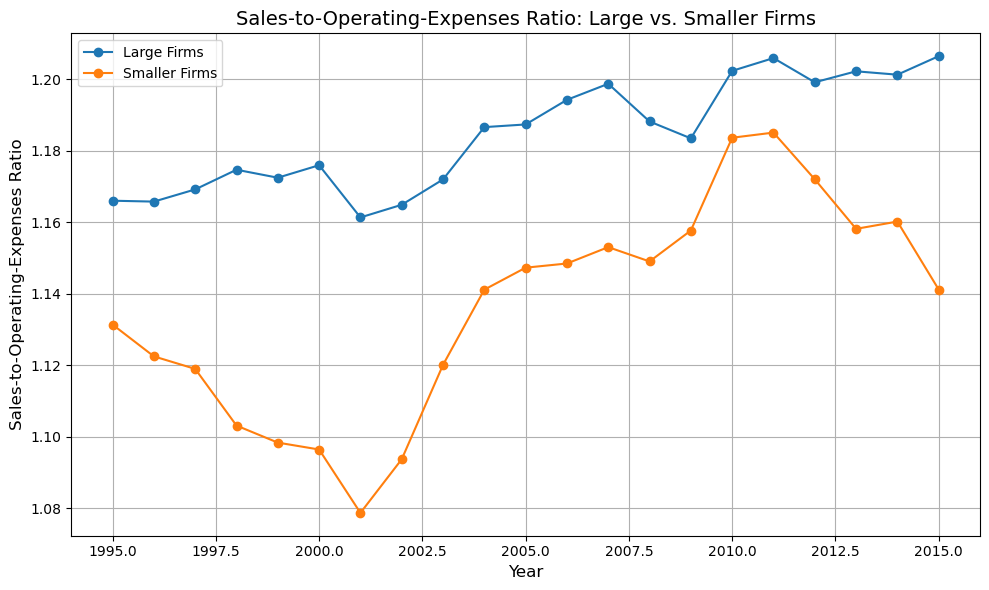

In [13]:
df['sales_to_operating_expenses'] = df['sales'] / df['operatingexpenses']

# Define large firms as those with a market share above 10%
large_firms = df[df['market_share'] > 0.1]
smaller_firms = df[df['market_share'] <= 0.1]

large_firms_avg_ratio = large_firms.groupby('year')['sales_to_operating_expenses'].mean().reset_index()
smaller_firms_avg_ratio = smaller_firms.groupby('year')['sales_to_operating_expenses'].mean().reset_index()

# Plot the average sales-to-operating-expenses ratio
plt.figure(figsize=(10, 6))
plt.plot(large_firms_avg_ratio['year'], large_firms_avg_ratio['sales_to_operating_expenses'], label='Large Firms', marker='o')
plt.plot(smaller_firms_avg_ratio['year'], smaller_firms_avg_ratio['sales_to_operating_expenses'], label='Smaller Firms', marker='o')

# Add labels, title, legend, and grid
plt.title('Sales-to-Operating-Expenses Ratio: Large vs. Smaller Firms', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales-to-Operating-Expenses Ratio', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

Large firms have increased the sales to operating expenses ratio from 1.165 to 1.21. Small firms have increased this ratio from 1.13 in 1995  to 1.14 so Van Reenan's point is true, but also not that strongly in this broad data. It seems definitely true in software though. 

I tried different ways of defining the market share threshold and did not find the results sensitive to anything from 10% to the 50% threshold.